<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/ML_Classification_Project/blob/main/ML_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member - Rooban J**


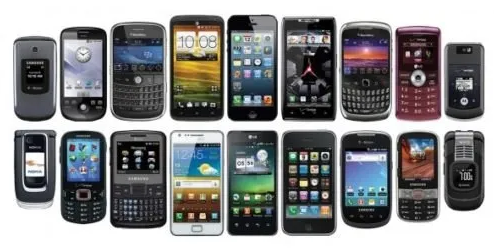

# **Project Summary -**

* The Project is done on dataset from mobile phone industry to predict and analyse the price range, because this field is highly competitive and challenging, variation in the price of a mobile phone is determined by various factors like battery power, clock speed, sim count, memory, camera quality, screen size, and more. The study used a dataset containing around 21 variables to predict the price range of mobile phones, categorized as low, medium, high, and very high.

* This Study has followed multiple steps to build a model. Such as Data Wrangling, Data Visualization, Feature Engineering, Model Fitting. As we see, process begins with Data Wrangling, where missing values were handled and unique values were checked. We identified that 180 phones had pixel resolution height (px_height) as 0 and two phones had screen width (sc_w) in cm as 0. The minimum value of px_height and sc_w should not be 0, because it does not make sense for a phone screen width or pixel height to be 0. Therefore, those 0 values are replaced with the mean values, ensuring that no missing values were left in the dataset.

* Next part of the analysis is Expolratory Data Analysis (EDA), which revealed that all category phones were distributed with equal price range. The analysis also indicated that battery capacity was positively correlated with the price range of mobile phones, and the distribution of battery capacity gradually increased with the price range. This suggested that consumers may be willing to pay more for a mobile phone with a higher battery capacity. From the graph, we found that around 50% of the devices had Bluetooth option and the scatter plot showed a clear positive correlation between RAM and Price range.

* Scatter plot indicates that when the price range increased, the amount of RAM in the device generally increased as well. The study also shows that the price of devices with dual sim was positively correlated. Additionally, the distribution of primary camera megapixels across different target categories was relatively consistent, indicating that this camera feature may not significantly influence the price of mobile phones. The study also found that mobile phones with higher price ranges tended to be lighter in weight compared to lower price range phones.

* Next stop of the study is to handle outliers for that, we performed Hypothesis Testing on the features. The study identified that RAM, battery power, and pixel quality were the most significant factors affecting the price range of mobile phones. Then we performed Feature Engineering to implement Machine Learning Models.

* In this study we built ML Models such as LOGISTIC REGRESSION, XGBoost and RANDOM FOREST. Based on the experiments, the study concluded that logistic regression and XGBoost algorithms with hyperparameters tuning yielded the best results in predicting the price range of mobile phones.

* In conclusion, We found some results from EDA like what are all the features are positively correlated and about the features which are influencing the deflection in price of mobile phones. Finally, we built ML models for predicting the price range of mobile phones and from the study we found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provided the best performance.



# **GitHub Link -**

https://github.com/Rooban-Jeyasundar/ML_Classification_Project.git

# **Problem Statement**


**In this study, we discuss about highly competitive mobile phone market. From the analysis companies want to understand about the factors that influencing the mobile price and the growth in sales of mobile phones. The main objective of this study is to find out the relation between features of a mobile phone(eg:- RAM, Internal Memory, etc). In Classification model, we are not going to predict the actual price but we study about price range indicating features.**



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Import Libraries for data cleaning and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for scaling, transforming, and modeling processes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import files
uploaded = files.upload()


Saving data_mobile_price_range.csv to data_mobile_price_range.csv


### Dataset First View

In [3]:
# Dataset First Look
import io
mobile_df = pd.read_csv((io.BytesIO(uploaded['data_mobile_price_range.csv'])),encoding='unicode_escape')
print(mobile_df.sample(10))

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1235           1971     1          0.5         1   0       0          40   
1941           1522     0          2.2         0   4       0          21   
685            1362     0          0.5         0   3       0          25   
577             934     0          1.1         0   7       0          24   
911            1284     1          2.8         1   0       0          10   
1728           1065     0          2.8         1   0       1          21   
1648            645     0          2.5         0  10       1          63   
184            1502     1          1.2         0   0       0          54   
877            1444     0          0.6         0   2       0          48   
1525           1517     0          2.5         0   2       1           8   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1235    0.3        186        7  ...        485       922   571     8     7   
1941 

In [4]:
mobile_df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print('Shape of Dataset',mobile_df.shape)
print('Count of Rows',mobile_df.shape[0])
print('Count of Columns',mobile_df.shape[1])

Shape of Dataset (2000, 21)
Count of Rows 2000
Count of Columns 21


### Dataset Information

In [6]:
# Dataset Info
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print("Does data have any duplicate values ?",mobile_df.duplicated())

print('Count of Duplicate values',len(mobile_df[mobile_df.duplicated()]))

Does data have any duplicate values ? 0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool
Count of Duplicate values 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

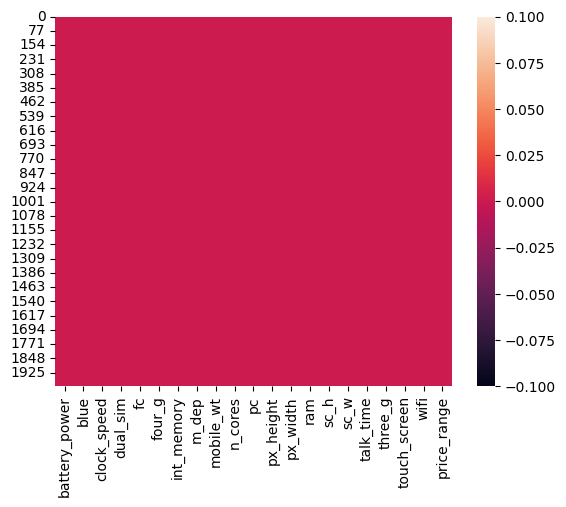

In [9]:
# Visualizing the missing values on a heatmap
sns.heatmap(mobile_df.isnull())

### What did you know about your dataset?

* We clearly see there are no indication in the Heatmap which means No Null Values in the dataset.

* As observation, we found that 21 Columns and 2000 Rows are in the dataset.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
#No. of columns/features
len(mobile_df.columns)

21

In [12]:
# Dataset Describe and Transpose
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

**Battery_power** - Total energy a battery can store in one time measured in mAh.

**Blue** - Has bluetooth or not.

**Clock_speed** - speed at which microprocessor executes instructions.

**Dual_sim** - Has dual sim support or not.

**Fc** - Front Camera mega pixels.

**Four_g** - Has 4G or not.

**Int_memory** - Internal Memory in Gigabytes.

**M_dep** - Mobile Depth in cm.

**Mobile_wt** - Weight of mobile phone.

**N_cores** - Number of cores of processor.

**Pc** - Primary Camera mega pixels.

**Px_height** - Pixel Resolution Height.

**Px_width** - Pixel Resolution Width.

**Ram** - Random Access Memory in Mega.

**Touch_screen** - Has touch screen or not.

**Wifi** - Has wifi or not.

**Sc_h** - Screen Height of mobile in cm.

**Sc_w** - Screen Width of mobile in cm.

**Talk_time** - longest time that a single battery charge will last when you are.

**Three_g** - Has 3G or not.

**Wifi** - Has wifi or not.

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(High Cost),3(Very High cost).

### Check Unique Values for each variable.

In [13]:
# Check Unique Values
mobile_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [14]:
# Check Unique Values for each variable.
print("Unique values coulmn-wise")
for column in mobile_df.columns:
  unique_values = mobile_df[column].unique()
  print(f"{column}:{unique_values}")

Unique values coulmn-wise
battery_power:[ 842 1021  563 ... 1139 1467  858]
blue:[0 1]
clock_speed:[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim:[0 1]
fc:[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g:[0 1]
int_memory:[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep:[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt:[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
 

## 3. ***Data Wrangling***

In [15]:
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
#Here px_height (pixel resolution height) and sc_w (screen width) shouldn't be zero because it doesn't add any value to the analysis
#So to avoid error in analysis, we are handling those values with respective mean.

#viewing the count & replacing 0 with mean value
px_height_error = sum(mobile_df.px_height == 0)
print(f"Zero values in px_height column = {px_height_error}")

px_height_mean = mobile_df.px_height.mean()
mobile_df.px_height = np.where(mobile_df.px_height==0,px_height_mean,mobile_df.px_height)
print(mobile_df)

Zero values in px_height column = 2
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px

In [ ]:
#viewing the count & replacing 0 with mean value
sc_w_error = sum(mobile_df.sc_w == 0)
print(f"Zero values in px_height column = {sc_w_error}")

sc_w_mean = mobile_df.sc_w.mean()
mobile_df.sc_w = np.where(mobile_df.sc_w==0,sc_w_mean,mobile_df.sc_w)
print(mobile_df)

In [17]:
#checking the duplicate value count
duplicate_value = len(mobile_df[mobile_df.duplicated()])
print(f"count of total duplicate values in all columns : {duplicate_value} ")
#Count of null values in each column
mobile_df.isnull().sum()

count of total duplicate values in all columns : 0 


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### What all manipulations have you done and insights you found?

**Observations**

**1**.From the study we have found that number of phones with pixel resolution height and screen width of mobile in cm are having 180 and 2 entries contains 0 values respectively.

**2**.The minimum value of px_height and sc_w should not be 0, because it does not make sense for a phone screen width or pixel height to be 0. Therefore, we should check for the solutions and handle these cases appropriately to avoid any issues during our analysis.

**3**.So we replaced the Zero (0) values with the mean values and no missing values left in the table so we make sure that our data is ready for data analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Price Range

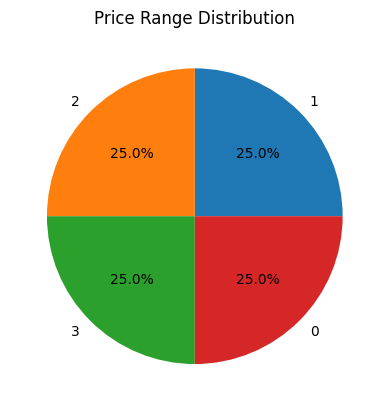

In [18]:
# Chart - 1 visualization code
price_count = mobile_df['price_range'].value_counts()
plt.pie(price_count,labels=price_count.index,autopct='%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts mostly useful to view the distribution of the data.

Here we know about the distribution of percentage of phones with price range from low to high.

##### 2. What is/are the insight(s) found from the chart?

Regarding the insights, we found that all categories of mobiles are equally distributed on price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes

From the chart, we are able to know about the distribution of phones in percentage on its price range.

#### Chart - 2
Battery Power

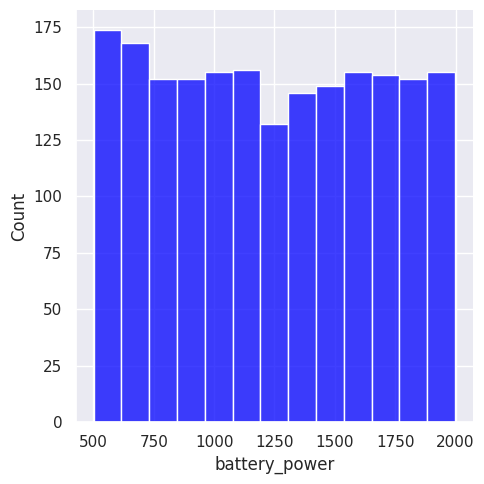

In [19]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(mobile_df['battery_power'],color='blue')
plt.show()

##### 1. Why did you pick the specific chart?

Here Bar chart is used to know about the distribution of count is increased with respect to battery power or not.

##### 2. What is/are the insight(s) found from the chart?

This above chart visualizes how the battery power (mAh), is distributed across the mobile counts in the dataset. We can observe that the distribution of battery capacity is positively correlated with the price range of the mobile phones, as there is a gradual increase in the battery capacity as the price range increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights gained from analyzing the relationship between the battery capacity and the price of a mobile phone can potentially lead to a positive business impact, which means there is a strong relationship between the battery capacity and the price of a mobile phone, and that consumers may be willing to pay more for a mobile phone with a higher battery capacity.

#### Chart - 3
Bluetooth

In [ ]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=mobile_df,x='blue',y='price_range',ax=ax,capsize=0.3)


##### 1. Why did you pick the specific chart?

Generally bar charts are used to know about the distribution of values in the dataset. Here we saw the distribution of bluetooth along the price.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we found that almost half the devices have Bluetooth option, and half of them don’t.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we get both kind of insights from the observation because almost half of the devices in the dataset have option of Bluetooth and half do not could have a positive business impact if a company can leverage this information to improve its products or marketing strategies. For example, a mobile phone manufacturer could use this insight to understand that customers value the presence of Bluetooth in their devices and therefore may prioritize investing in the development of Bluetooth-related features or promoting the presence of Bluetooth in their marketing efforts.

On the other end, this observation could also have negative consequences if a company misinterprets or misunderstood this information. For an instance, a company might assume that including Bluetooth in their devices is not important because half of the devices in the dataset do not have it. However, this conclusion ignores the fact that many customers still value the presence of Bluetooth in their devices, and a manufacturer that fails to include Bluetooth in their devices could miss out on potential sales and growth opportunities. Therefore, it is important to interpret this information carefully and use it in a way that aligns with customer preferences and market trends.

#### Chart - 4


In [ ]:
# Chart - 4 visualization code
#Grouping the data by price range, dual sim and no.of devices in each group
sim_count = mobile_df.groupby(['price_range','dual_sim'])['dual_sim'].count()

sim_count = sim_count.unstack() #Reshaping the values in the dataset

#plot a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind='bar',stacked=True)
plt.xlabel('Price Range')
plt.ylabel('count')
plt.title('No. of dual sim devices')
plt.show()

##### 1. Why did you pick the specific chart?

Here bar chart is used to show the distribution between price range and sim count.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we know about how mobile price range is distributed along sim count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
This insight might useful for the mobile companies to upgrade their new products based on the result.

#### Chart - 5
Plotting relationship between Price Range & Battery Power

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='battery_power',data=mobile_df)
plt.show()

##### 1. Why did you pick the specific chart?

Above bar chart is picked to visualize the relation between battery power and price range, because it is preferred for segmented visualization of data.

##### 2. What is/are the insight(s) found from the chart?

This chart clearly provide insight of battery resulting in price range of the mobile phones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

Mobiles companies will clearly see that customers are ready to pay extra price for the mobiles with higher batter capacity. This will be helpful in increasing the production and profit.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='ram',data=mobile_df)
plt.show()


##### 1. Why did you pick the specific chart?

 Bar graphs has the ability to represent data that shows changes over other category, which helps people visualize trends and relation.

##### 2. What is/are the insight(s) found from the chart?

Insight that found from the chart is Mobiles with higher RAM will costlier than the lower RAM mobiles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Output of the above chart will leave some impact on business, that is customers mostly prefer mobiles with high RAM though it is costlier.

If suppose on negative side, mobiles with low RAM is not prefered by most people though it is less in price. So increase in production of this kind of mobiles will lead to negative growth.



#### Chart - 7

In [ ]:
# Chart - 7 visualization code
colors = {0: 'red',1:'blue', 2:'yellow', 3:'green'}

plt.scatter(mobile_df['price_range'],mobile_df['ram'],c=mobile_df['price_range'].apply(lambda x:colors[x]))
plt.xlabel('price_range')
plt.ylabel('ram')
plt.show()

##### 1. Why did you pick the specific chart?

Here Scatter plot is used to know the seperation of values(mobiles) based on RAM

##### 2. What is/are the insight(s) found from the chart?

Chart shows a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This suggests based on amount of RAM in the device will impact in the increase of price range as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights gained from the scatter plot, shows the positive correlation between RAM and price range, which can be valuable for businesses. For example, businesses can use this information to design and market smartphones with higher RAM for customers willing to pay higher prices, potentially leading to increase in business and revenue.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
#create a boxplot of front camera mp's grouped by price range
sns.boxplot(x='price_range',y='fc',data=mobile_df)
plt.xlabel('Price Range')
plt.xlabel('Front camera megapixels')
plt.title('Front camera megapixels vs Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we found that is almost same impact on price range in all categories of front camera megapixels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The observation that the distribution of front camera megapixels is similar across all price ranges suggests that this feature alone may not be a helpful predictor of price range. However, this does not necessarily mean that the insights gained from this analysis cannot create a positive business impact.

For example, if a company relied solely on front camera megapixels to determine pricing, this could lead to negative growth if competitors offered more advanced features that customers value more highly. Therefore, it is important for businesses to consider multiple factors and stay up-to-date with evolving customer preferences and technological advancements in order to remain competitive in the market.

#### Chart - 9
Plotting relation between Price Range & Network (3G)

In [ ]:
mobile_df.columns

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x=mobile_df['three_g'],hue=mobile_df['price_range'],palette='bright')
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily. It shows the relationship using two axes, in which the categories are on one axis and the discrete values are on the other axis.

##### 2. What is/are the insight(s) found from the chart?

From the analysis, we found that people mostly prefer the mobiles with 3G network.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights will impact in both the ways.

On positive side, if mobiles with most updated network will preferred by most of the customer. Companies with updated network will see high growth in sales.

On the flip side, if a company is not updated with its network feature will face negative growth.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
#set up the figure and axes
fig, axs = plt.subplots(1,2,figsize=(15,5))

#create kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=mobile_df,x='mobile_wt',hue="price_range",ax=axs[0])

#create a box plot
sns.boxplot(data=mobile_df,x='price_range',y="mobile_wt",ax=axs[1])

#set the x-label for both the subplots
for ax in axs:
  ax.set_xlabel('Price range')

#set y-label for box plot subplot
axs[1].set_ylabel('Mobile Weight')

#set the title for the subplots
axs[0].set_title('Distribution of Mobile Weight by price range')
axs[1].set_title('Mobile Weight box plot by price range')

#Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

 Chart is preferred to know about the distribution of mobile weight by price range and change in mobile weight with respect to price range.

##### 2. What is/are the insight(s) found from the chart?

Mobiles which is lighter in weight is high in price when compared to lower price range phones with more weight.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis can definitely help create a business impact but regarding the positive and negative effect it is based on application of outcome results.

 By understanding which features are more important in determining the price range of mobile phones, businesses can better position their products and pricing strategies in the market.

 For example, in this instance a certain feature such as mobile weight is highly valued by customers in a specific price range, businesses can focus on improving that feature to differentiate themselves from competitors and increase sales.



#### Chart - 11

Screen Size


In [ ]:
# Chart - 11 visualization code
#Defining a new variable "sc_size" as the diagonal screen size in inches
mobile_df['sc_size'] = np.sqrt((mobile_df['sc_h']**2)+(mobile_df['sc_w']**2))

#Converting the screen size from CM to INCHES and round off the values
mobile_df['sc_size'] = round(mobile_df['sc_size']/2.54,2)

In [ ]:
#create a new variable sc_size in inches
mobile_df['sc_size'] = np.sqrt((mobile_df['sc_h']**2)+(mobile_df['sc_w']**2))/2.54
mobile_df['sc_size'] = mobile_df['sc_size'].round(2)

#Plot the distribution and boxplot of screensize by price range
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(data=mobile_df,x='sc_size',hue='price_range',ax=axs[0])
sns.boxplot(data=mobile_df,x='price_range',y='sc_size',ax=axs[1])

#set axis lables and title
axs[0].set_xlabel('Screen Size in Inches')
axs[0].set_ylabel('Density')
axs[0].set_title('Distribution of Screen Size by price range')
axs[1].set_xlabel('Price range')
axs[1].set_ylabel('Screen Size in Inches')
axs[1].set_title('Boxplot of Screen Size by price range')

plt.show()

##### 1. Why did you pick the specific chart?

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

##### 2. What is/are the insight(s) found from the chart?

The analysis on this Screen Size distribution among different target categories indicates that there is not a significant difference in the distribution, suggesting this feature may not be the sole driving factor in determining the target categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding insights from the analysis which features are most important in determining the price range of mobile phones, businesses can make informed decisions about product development, marketing, and pricing strategies. For example, if a particular brand has a reputation for producing high-quality cameras, they can leverage this information to target customers who prioritize camera quality and are willing to pay a premium price for it.
In this case screen size is not having much effect on the price range.

Additionally, if a business relies heavily on a particular feature that is no longer in demand or becomes outdated, it may struggle to remain competitive in the market. Therefore, it is crucial to take a holistic approach and consider multiple factors when making decisions based on data analysis.

#### Chart - 12
Plotting relation between Price Range & Pixel Width along with density

In [ ]:
# Chart - 12 visualization code
#set up the figure and axes
fig, axs = plt.subplots(1,2,figsize=(15,5))

#create kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=mobile_df,x='px_width',hue="price_range",fill=True,common_norm=False, palette='viridis',ax=axs[0])
axs[0].set_xlabel('Pixel width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel width distribution by price range')

#create a box plot
sns.boxplot(data=mobile_df,x='price_range',y="px_width", palette='viridis',ax=axs[1])
axs[1].set_xlabel('Price range')
axs[1].set_ylabel('Pixel width')
axs[1].set_title('Pixel width by price range')

plt.tight_layout() #Adjust the layout
plt.show()

#### Chart - 13
Plotting relation between Price Range & Pixel Height along with density

In [ ]:
# Chart - 13 visualization code
#set up the figure and axes
fig, axs = plt.subplots(1,2,figsize=(15,5))

#create kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=mobile_df,x='px_height',hue="price_range",fill=True,common_norm=False, palette='viridis',ax=axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height distribution by price range')

#create a box plot
sns.boxplot(data=mobile_df,x='price_range',y="px_height", palette='viridis',ax=axs[1])
axs[1].set_xlabel('Price range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by price range')

plt.tight_layout() #Adjust the layout
plt.show()

##### 1. Why did you pick the specific chart?

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable and box plot captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups

##### 2. What is/are the insight(s) found from the chart?

Based on the insights from the analysis of the pixel width and pixel height distribution across different price ranges, it can be observed that there is not a signifiacnt increase in pixel width/height as we move from low cost to very high cost mobile phones.

In particular, mobile phones with medium cost and high cost have almost equal pixel width, indicating that this may not be the sole driving factor in deciding the price range of mobile phones. On other hand, Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of pixel height and pixel width distribution across different price ranges can help create a positive business impact by providing useful information to mobile phone manufacturers and marketers. By understanding the relationship between pixel height and price range, manufacturers can optimize their product to meet the demands of the market and improve sales by running targeted campaigns.

However, Ingeneral relying solely on one or two factors (pixel height & width) to determine the price range of mobile phones could lead to negative growth, as it may not accurately meet the expectations of the target market. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code to check multi collinearity

plt.figure(figsize=[20,15])
sns.heatmap(mobile_df.corr(),annot=True)
plt.show()


##### 1. Why did you pick the specific chart?

Heatmap is a graphical way to visualize visitor behavior data in the form of hot and cold spots employing a warm-to-cool color scheme. The warm colors indicate sections with the most visitor interaction, different ones being the area of highest interaction, and the cool similiar point to the sections with the lowest interaction.

##### 2. What is/are the insight(s) found from the chart?

* From the heatmap, there is high positive correlation between RAM and price_range which means RAM will be a major deciding factor in estimating the price range of a mobile phone.

* Some of the features have negative correlation too like battery_power vs Wifi, clock speed vs px_width etc..

* In general from this chart we learn about the collinearity between the features in the dataset which is helpful in analysis and model building process.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

According to the analysis,

H0 - Null hypothesis : All categories of phones are distributed with equal price range.

Ha - Alternative hypothesis : All categories of phones are not distributed with equal price range..

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

#Calculate observed frequency distribution & expected frequency distribution
obs_freq = mobile_df['price_range'].value_counts().values
total = len(mobile_df)
exp_freq = [total/4]*4

#perform chi-square test
chi2, p = stats.chisquare(obs_freq,f_exp=exp_freq)

#Print Results
print(f'Chi-Square Statistic:{chi2},P-Value:{p}')

Chi-Square Statistic:0.0,P-Value:1.0


##### Which statistical test have you done to obtain P-Value?

In the above hypothesis testing study, process is done to analyse the statement that "All category phones are distributed with equal price range". In this study, for finding the p-value we have used the Chi-square goodness-of-fit test.

The Chi-square goodness of fit test is a statistical hypothesis test used to determine whether a variable is likely to come from a specified distribution or not. It is often used to evaluate whether sample data is representative of the full population.

The p-value obtained from the Chi-square goodness-of-fit test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. A p-value less than the significance level (usually 0.05) indicates that we reject the null hypothesis and conclude that the observed distribution is significantly different than the expected distribution. A p-value greater than or equal to the significance level indicates that we fail to reject the null hypothesis and conclude that the observed distribution is not significantly different than the expected distribution.

##### Why did you choose the specific statistical test?

For the hypothesis study we chose the Chi-square test because it is an appropriate statistical test to use when we want to compare an observed frequency distribution with a theoretical distribution, such as the null hypothesis distribution.

In this study, the null hypothesis states that all categories of phones have an equal price range distribution. Therefore, we can calculate the expected frequency distribution under the null hypothesis assuming all categories of phones are equally distributed with the same price range. We can then compare this expected frequency distribution with the observed frequency distribution obtained from the data using the Chi-square goodness-of-fit test. In case  If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis and conclude that there is no evidence of a significant difference between the observed and expected frequency distributions.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 - Null hypothesis : Devices with 3G sims is the same across all price ranges.

Ha - Alternative hypothesis : Difference of devices with 3G sims across at least one pair of price ranges.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

#Calculate Contingency table and Print the Values
contingency_table = pd.crosstab(mobile_df['price_range'],mobile_df['three_g'])
print(contingency_table)

#perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

#Print Results
print(f'Chi-Square Statistic:',chi2)
print('P-Value:',p_value)

three_g        0    1
price_range          
0            127  373
1            122  378
2            113  387
3            115  385
Chi-Square Statistic: 1.3737644035343461
P-Value: 0.7116958581372179


##### Which statistical test have you done to obtain P-Value?

The chi-square test of independence is used in this case to test the association between two categorical variables. In this study, the two variables were the price range and the presence of three G sims in the devices. The test calculates a chi-square statistic, which measures the difference between the observed and expected frequencies under the null hypothesis of no association between the variables.

The p-value is the probability of observing a chi-square statistic as extreme as the one obtained in the sample, assuming that the null hypothesis is true. In general, If the p-value is small (less than 0.05), we reject the null hypothesis and conclude that there is evidence of a significant association between the variables. But the p-value is large (greater than 0.05), we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest a significant association between the variables.

##### Why did you choose the specific statistical test?

Generally, Chi-square test of independence checks whether two variables are likely to be related or not. We have counts for two categorical or nominal variables. We also have an idea that the two variables are not related. The test gives us a way to decide if our idea is plausible or not.

From the result of above study, the chi-square test shows that p-value around 0.7117, which is greater than the nomianal significance level of 0.05. This means that we fail to reject the null hypothesis, and there is not enough evidence to conclude that there is a significant association between the features that is price_range and three_g.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

In the above process, we have calculated null values in each columns and sum up the null value.

From the above statistics, we found No missing value available.

### 2. Handling Outliers

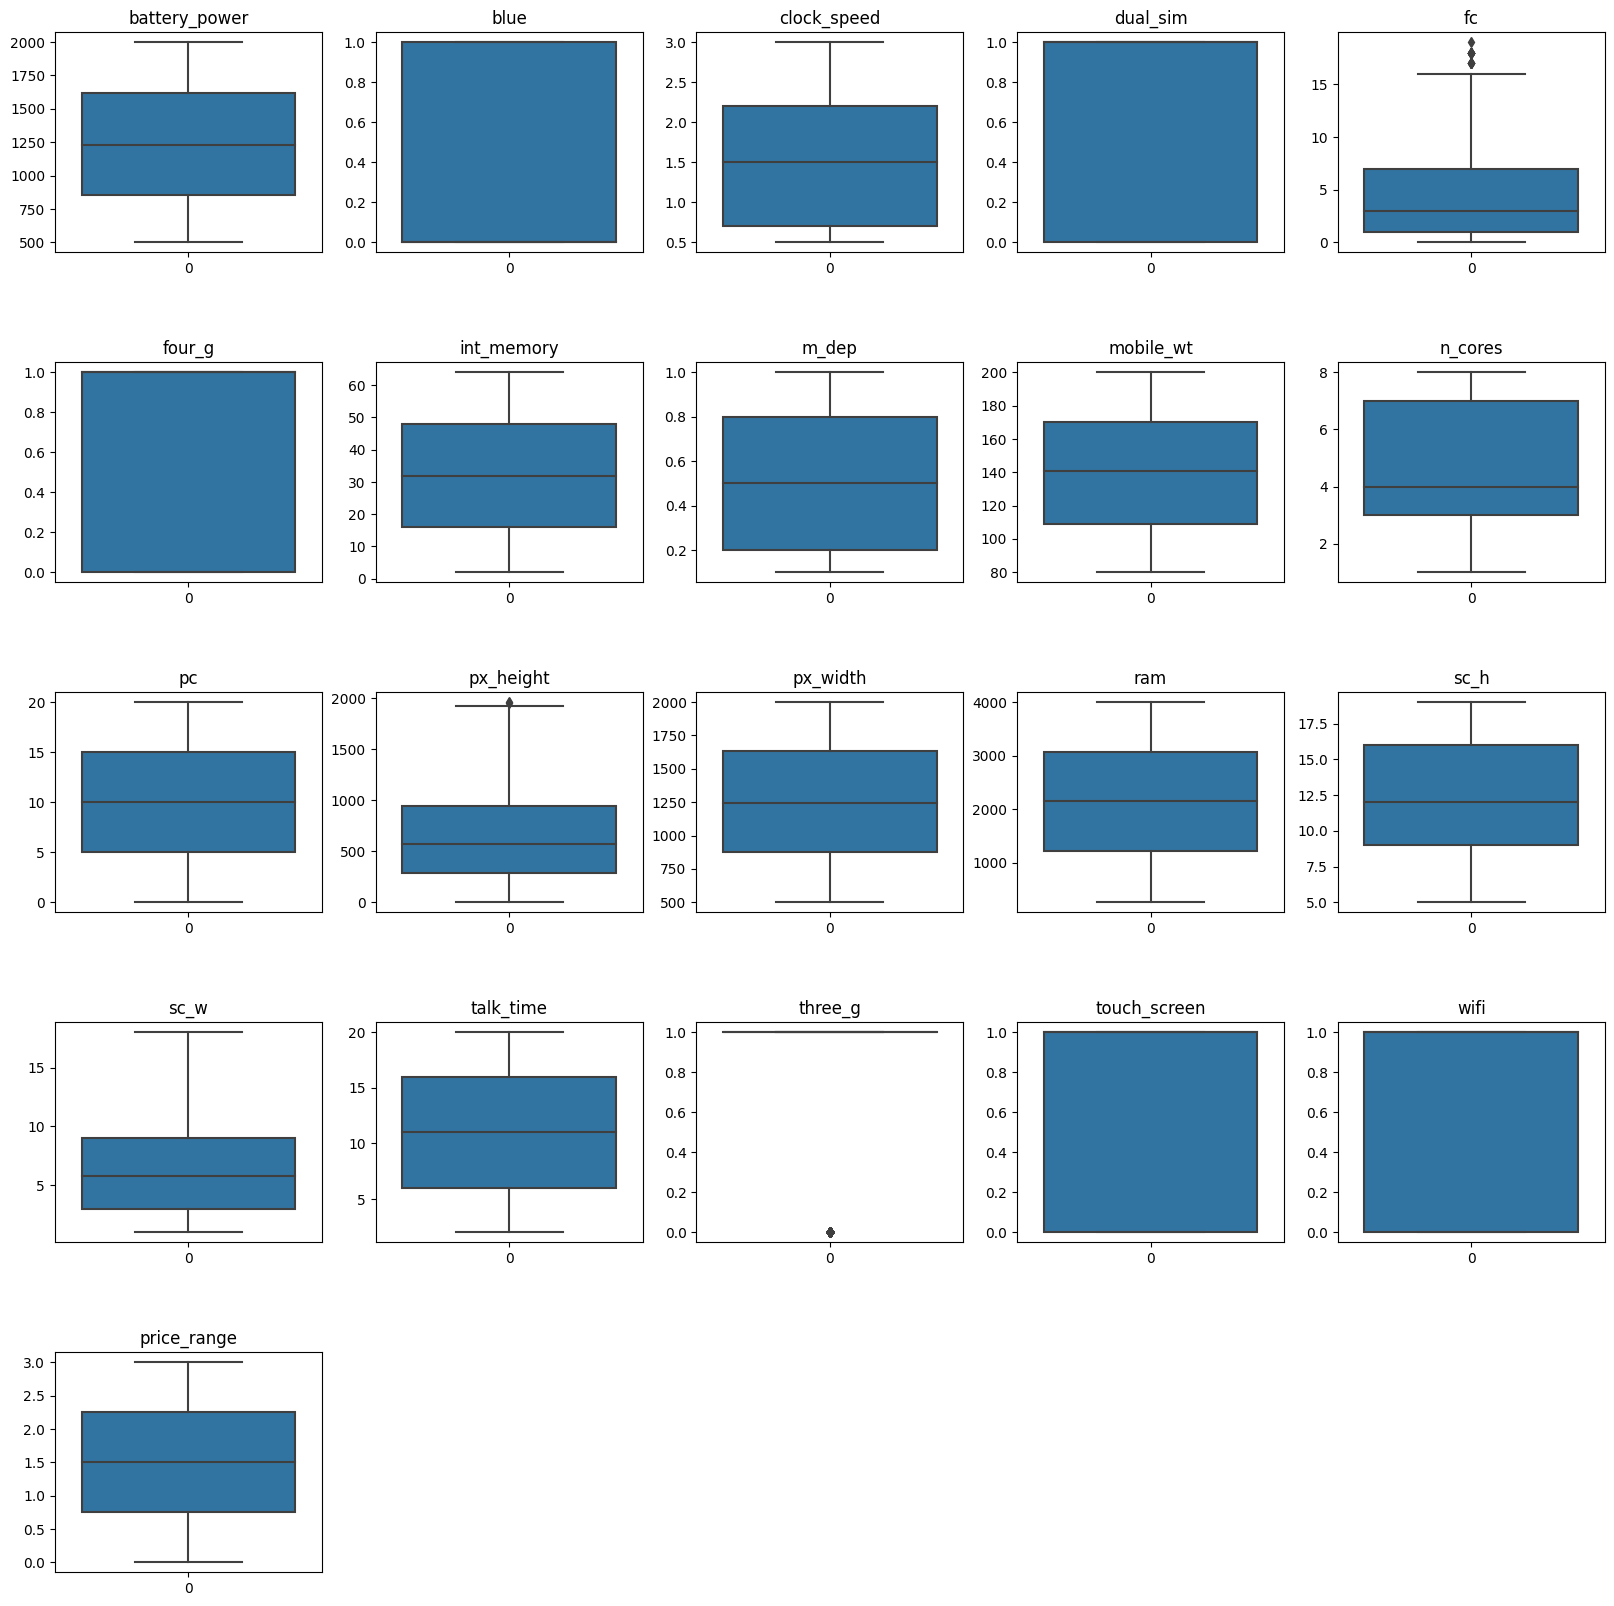

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(20,20))

#Create loop through each column then create subplot & boxplot
for index,item in enumerate([i for i in mobile_df.describe().columns.to_list()]):
  plt.subplot(5,5,index+1)
  sns.boxplot(mobile_df[item])
  plt.title(item)
  plt.subplots_adjust(hspace=0.5)

print('\n')

##### What all outlier treatment techniques have you used and why did you use those techniques?

From the above results, we clearly see there are not much outliers in the data.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

All features have integers or float, so there is no necessity to do categorical encoding.

### 4. Data Transformation

In [20]:
#Doing transformation to avoid Overfitting
mobile_df.drop(['px_height','px_width'], axis = 1, inplace=True)

#Define X & Y
x = mobile_df.drop(['price_range'],axis=1)
y = mobile_df['price_range']

In [21]:
x.shape

(2000, 18)

In [22]:
y.shape

(2000,)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

 It is important to drop the columns which doesn't have much value in the analysis.

### 5. Data Scaling

In [23]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)

##### Which method have you used to scale you data and why?



*   The method we used here to scale here is MinMaxScaler, it will generally scale down the values into specified range of 0 and 1.

* MinMaxScaler is also useful in finding outliers and treating them.


* MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.


### 6. Data Splitting

In [24]:

#Define X & Y
x = mobile_df.drop(['price_range'],axis=1)
y = mobile_df['price_range']

In [25]:
x.shape

(2000, 18)

In [26]:
y.shape

(2000,)

In [27]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(1600, 18)

In [29]:
y_train.shape

(1600,)

##### What data splitting ratio have you used and why?

* From the above code, we clearly see that dataset splits into 80% as Train and 20% as Test, by assigning the parameter test_size=0.2 to split in the ratio of 80:20

* This ratio is mostly used splitting ratio in the field of machine learning, why because 80 % data is assigning for model to train and to learn enough from the data and 20 % of test data is more than enough to test the model performance.


## ***7. ML Model Implementation***

### ML Model - 1
▶ Logistic Regression Model

In [30]:
# ML Model - 1 Implementation

# Fit the Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Predict on the model
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

#creating the report on test set
from sklearn.metrics import classification_report
print('Classification report on test set')
print(classification_report(y_pred_test,y_test))


Classification report on test set
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.68      0.76      0.72        82
           2       0.68      0.64      0.66        98
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400



In [31]:
#creating the evalreport on train set
from sklearn.metrics import classification_report
print('Classification report on train set')
print(classification_report(y_pred_train,y_train))

Classification report on train set
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       421
           1       0.75      0.79      0.77       386
           2       0.73      0.79      0.76       379
           3       0.92      0.86      0.89       414

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.84      0.83      0.83      1600



[[96  9  0  0]
 [11 62 18  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


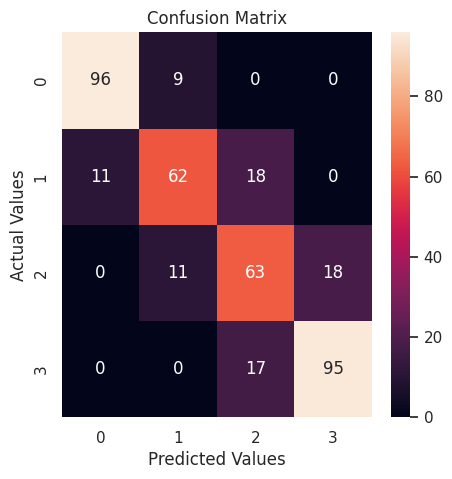

In [32]:
#Creating the Confusion Matrix and visualizing the matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

ax = sns.heatmap(confusion_matrix,annot=True)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* From the above execution, we clearly see that Logistic Regression Model is used for prediction.

* For evaluation metrics, classification report explains about precision,recall, f1-score & support for each class.

* From the result of evaluation metrics, Model shows an overall accuracy of 83%, which means the model correctly classified 83% of the instances in the training set.

* Evaluation results of all the classes are shown in the above results chart. For example, if we see the evaluation results for the Class 0,

    :- Precision for class 0 is 93%, means models prediction is correct 93% of the time.

    :- Recall for class 0 is 88%, which means the model correctly identifying 88% of actual instances in the dataset.

    :- F1-score for class 0 is 90%, which is a combination of both Precision and Recall results.

* On the whole, model is performing well with the average score of 83% on all the metrics.  But for making more valid conclusions further analysis has to be done.

#### 2. Cross- Validation & Hyperparameter Tuning

In [33]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score
# Fit the Algorithm
lr_model = LogisticRegression()
cv_scores = cross_val_score(lr_model, scaled_x, y, cv=5)

print('Cross-Validation Scores',cv_scores)
print('Average Cross-Validation Scores',np.mean(cv_scores))


Cross-Validation Scores [0.8    0.825  0.83   0.8125 0.815 ]
Average Cross-Validation Scores 0.8164999999999999


In [34]:
lr_model = LogisticRegression()
param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
cv_grid = GridSearchCV(lr_model, param_grid, cv=5)
cv_grid.fit(scaled_x,y)

print('Best Cross-Validation Score',cv_grid.best_score_)
print('Best Parameters',cv_grid.best_params_)
print('Test Set Score',cv_grid.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Cross-Validation Score 0.8225
Best Parameters {'C': 10}
Test Set Score 0.8125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#### 1. Which hyperparameter optimization technique have you used and why?

In the above analysis, we used GridSearchCV as a hyperparameter tuning technique. GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

Overall, GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.



#### 2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen some stable improvement, from the result best cross-validation score achieved was 0.82, and the best hyperparameter value for C was found to be 10.

After model training, we got test set score as 0.82 with best hyperparameters. So it appears that the logistic regression model with the selected hyperparameters is a good fit for the dataset, achieving an accuracy score of 0.82 on the both sets.



#### 3.Explain each evaluation metric's indication towards business and the business impact of the ML model used.



1.   Precision -  In this study of mobile price range prediction, a high precision score would indicate that the model is accurately predicting which mobile phones are in a particular price range based on other features. This information is helpful for businesses to modify their marketing campaigns  to attract more target customer to improve their impact.

2.   Recall - High recall score would indicate that the model is correctly identifying all mobile phones that belong in a certain price range which will be useful for the businesses.

3. F1 Score - In general, F1-score is the harmonic mean of precision and recall, and it provides a balanced measure of both metrics. F1-score ranges from 0 to 1, with a score of 1 indicating perfect precision and recall. In this case, if results shows high F1 score then our model is performing well in both identifying mobile phones that belong in a certain price range and accurately predicting which mobile phones are in that range.



### ML Model - 2
▶ XG Boost Model

In [35]:
#Implementing XG Boost on the dataset
from xgboost import XGBClassifier
xgboost = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgboost.fit(x_train,y_train)
#XGBClassifier

# Predict on the model
y_pred_train = xgboost.predict(x_train)
y_pred_test = xgboost.predict(x_test)

#creating the report on test set
from sklearn.metrics import classification_report
xg_score = classification_report(y_test,y_pred_test)
print('XG Boost Classification report on test set')
print(xg_score)


XG Boost Classification report on test set
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       105
           1       0.75      0.71      0.73        91
           2       0.60      0.70      0.65        92
           3       0.87      0.76      0.81       112

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.78      0.78       400



In [36]:
#creating the evalreport on train set
from sklearn.metrics import classification_report
xg_score = classification_report(y_train,y_pred_train)
print('XG Boost Classification report on train set')
print(xg_score)


XG Boost Classification report on train set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       395
           1       0.99      0.98      0.98       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning technique. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

* From the above, XGBoost model bulit on the training set, model have achieved near perfect high accuracy score of 0.99 also other evaluation metrics like precision, recall, and F1-score are also very high on each class, ranging from 0.99 to 1.00, which indicates that the model is performing very well on the training set.

* Likewise both the averages (macro and weighted) of F1-scores are also very high, which means that the model is able to generalize well to all the classes and that indicating model is not biased towards any particular class.
But overall performance of this model is based on performance on the test set to ensure that it is not overfitting to the training data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [37]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm in XGBoost Classifier
xgboost = XGBClassifier()

# Defining the hyperparameter
parameters = {'max_depth':[3,5,7],
              'learning_rate':[0.1,0.01,0.001],
              'n_estimators':[100,500,1000]}

#Cross Validation and Hyper Parameter Tuning and Print the result scores
grid = GridSearchCV(xgboost,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

print('Best Hyperparameter :',grid.best_params_)
print('CV Score :',grid.best_score_)

#Evaluation
y_pred_test = grid.predict(x_test)
score = classification_report(y_test,y_pred_test)
print('Classification report on train set')
print(score)

Best Hyperparameter : {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
CV Score : 0.8143750000000001
Classification report on train set
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.75      0.77      0.76        91
           2       0.65      0.72      0.68        92
           3       0.88      0.78      0.82       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



[[96  9  0  0]
 [10 70 11  0]
 [ 0 14 66 12]
 [ 0  0 25 87]]


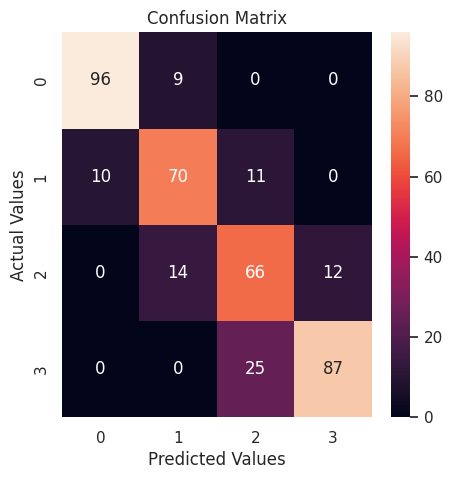

In [38]:
#Creating the Confusion Matrix and visualizing the matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

ax = sns.heatmap(confusion_matrix,annot=True)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')
plt.show()

In [39]:
#Evaluation
score = classification_report(y_train ,y_pred_train)
print('Classification report on train set')
print(score)

Classification report on train set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       395
           1       0.99      0.98      0.98       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



##### Which hyperparameter optimization technique have you used and why?

To get the best set of hyperparameters we can use Grid Search. Grid Search passes all combinations of hyperparameters one by one into the model and check the result. Finally it gives us the set of hyperparemeters which gives the best result after passing in the model.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the model results, we see very slight improvement in the overall score which is increased from 0.81 to 0.815. Likewise precision, recall, and f1-score for each class also improved slightly in the test set classification report.
Overall, XG Boost model shows very good result in both train & test dataset.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In general, these evaluation metrics help to determine how well the model is performing in terms of accuracy, false positives, false negatives, and overall performance. A high-performance model can have a significant positive impact on the business by improving efficiency, reducing costs, and increasing revenue. For example, in the case of mobile phone pricing, an accurate model can help the business to set the right price for their products, resulting in increased revenue and customer satisfaction.

* **Precision**: It is the ratio of true positive predictions to the total number of positive predictions made by the model. In the context of above problem, precision indicates how accurately the model predicts the correct mobile phone price range. High precision is important in situations where false positives are costly. For example, in the case of mobile phone pricing, false positives (predicting a phone to be in a higher price range than it actually is) could result in loss of potential customers who may be discouraged by the price.

* **Recall**: It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It measures how well the model is able to identify all positive instances. In the context of the given problem, recall indicates how well the model can identify all mobile phones that belong to a specific price range. High recall is important when false negatives are costly. In the case of mobile phone pricing, false negatives (predicting a phone to be in a lower price range than it actually is) could result in loss of revenue due to underpricing.

* **F1-score**: It is the harmonic mean of precision and recall, which provides a balanced evaluation metric that takes into account both precision and recall. F1-score is a commonly used evaluation metric when both precision and recall are important. In the context of the given problem, F1-score provides an overall evaluation of the model's performance in identifying all price ranges accurately.

* **Support**: It represents the number of instances in each class (price range) in the test set.


### ML Model - 3
▶ Random Forest Model

In [40]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, classification_report

# Fit the Algorithm
rf_classifier = RandomForestClassifier(n_estimators=300)
rf_classifier.fit(x_train,y_train)

# Predict on the model
y_pred_train = rf_classifier.predict(x_train)
y_pred = rf_classifier.predict(x_test)

train_score = accuracy_score(y_train,y_pred_train)
test_score = accuracy_score(y_test,y_pred)

print('Train Score',train_score)
print('Test Score',test_score)

Train Score 1.0
Test Score 0.8075


In [41]:
#Evaluation on Classification Report
score = classification_report(y_test ,y_pred)
print('Classification report on test set')
print(score)

Classification report on test set
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       105
           1       0.80      0.77      0.79        91
           2       0.64      0.74      0.68        92
           3       0.88      0.76      0.81       112

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.82      0.81      0.81       400



[[100   5   0   0]
 [  9  70  12   0]
 [  0  12  68  12]
 [  0   0  27  85]]


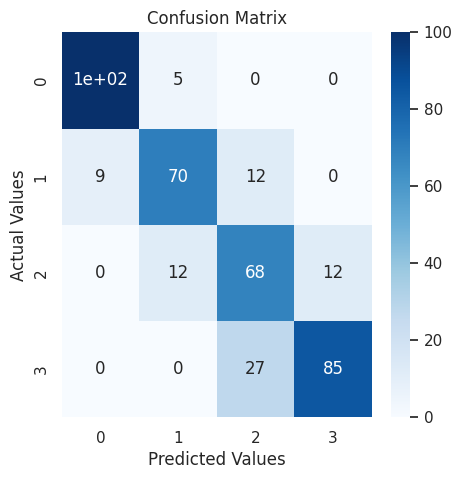

In [42]:
#Creating the Confusion Matrix and visualizing the matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

ax = sns.heatmap(confusion_matrix,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')
plt.show()

### **FEATURES STORED**

In [43]:
feature_importance = pd.DataFrame({'Feature':x.columns,'Score':rf_classifier.feature_importances_}).sort_values(by='Score',ascending=False).reset_index(drop=True)

feature_importance.head()

,Feature,Score
0,ram,0.494539
1,battery_power,0.088802
2,mobile_wt,0.050271
3,int_memory,0.046811
4,talk_time,0.038686


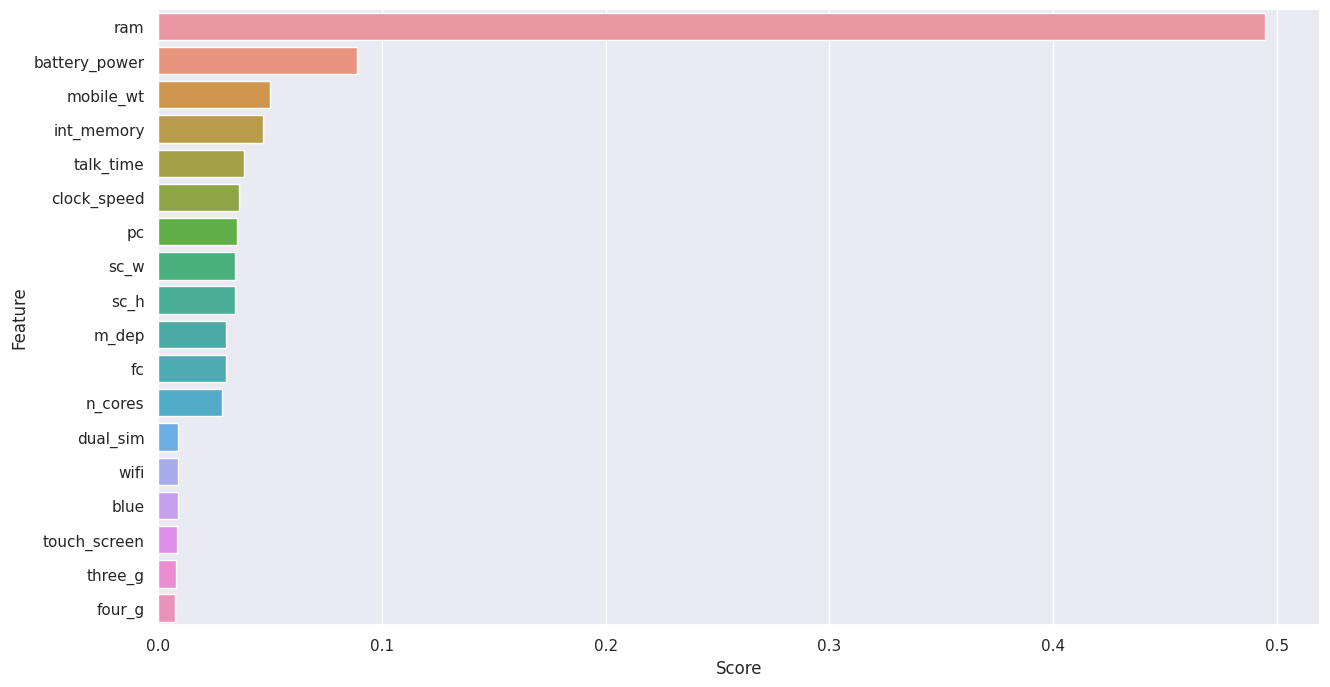

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'],y=feature_importance['Feature'])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

From the above Random Forest Classifier model, we get accuracy score of 0.80 which means prediction made on the data is 80% correct. Then the model shows moderate performance across all other evaluation metrics like Precision, Recall and F1 score on all the classes. Overall metric values ranges from  0.72 to 0.92, which is moderate.

#### 2. Cross- Validation & Hyperparameter Tuning

In [45]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, parameters, scoring='accuracy', cv=3)
clsr.fit(x, y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [46]:
print('Best Parameters ',clsr.best_params_)

print('Best Estimators ',clsr.best_estimator_)

print('Best Score ',clsr.best_score_)

Best Parameters  {'max_depth': 40, 'max_features': 'auto', 'max_leaf_nodes': 40, 'min_samples_split': 4, 'n_estimators': 200}
Best Estimators  RandomForestClassifier(max_depth=40, max_features='auto', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)
Best Score  0.8094984039511776


[[96  9  0  0]
 [10 70 11  0]
 [ 0 14 66 12]
 [ 0  0 25 87]]


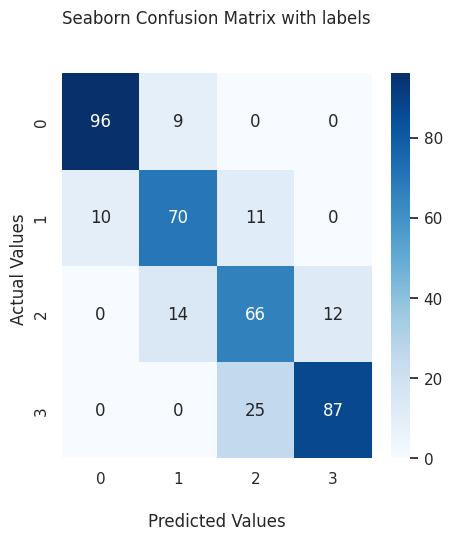

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [48]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [49]:
from sklearn.metrics import accuracy_score, classification_report
# accuracy score for Training set
y_pred = clsr.predict(x_train)
accuracy_score(y_train, y_pred)
print(accuracy_score)

print(classification_report(y_train, y_pred))

<function accuracy_score at 0x7ddad16ddfc0>
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       395
           1       0.87      0.84      0.86       409
           2       0.87      0.84      0.85       408
           3       0.93      0.94      0.93       388

    accuracy                           0.90      1600
   macro avg       0.89      0.90      0.90      1600
weighted avg       0.89      0.90      0.89      1600



In [50]:
# accuracy score for Test set
y_pred = clsr.predict(x_test)
accuracy_score(y_test, y_pred)
print(accuracy_score)
print(classification_report(y_test, y_pred))

<function accuracy_score at 0x7ddad16ddfc0>
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       105
           1       0.80      0.73      0.76        91
           2       0.66      0.74      0.70        92
           3       0.88      0.81      0.85       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.82       400



### FEATURES STORED

In [51]:
feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.715370
1,battery_power,0.072142
2,mobile_wt,0.029993
3,int_memory,0.029938
4,clock_speed,0.019114


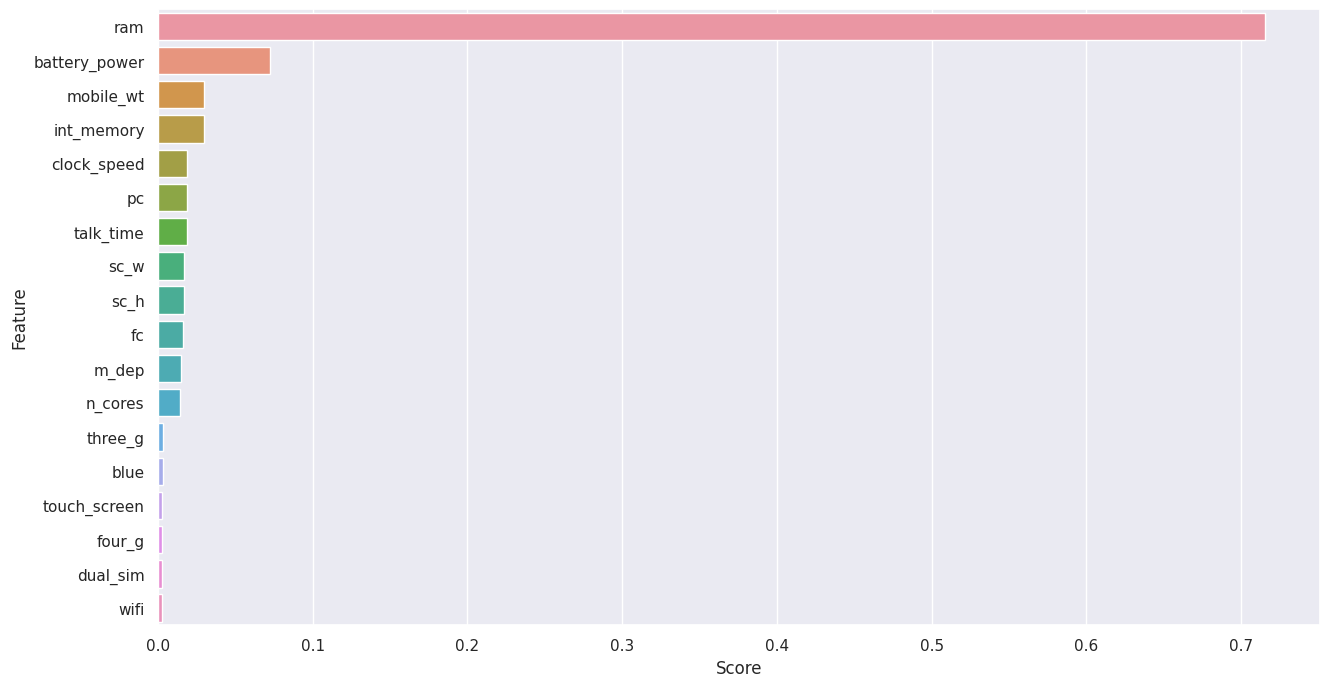

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

### **Model Explainability Tool**

In [55]:
#Using Model explainability tool SHAP(Shapley) to find feature importance

import shap

In [56]:
explainer = shap.Explainer(clsr)
shap_values = explainer.shap_values(x_test)

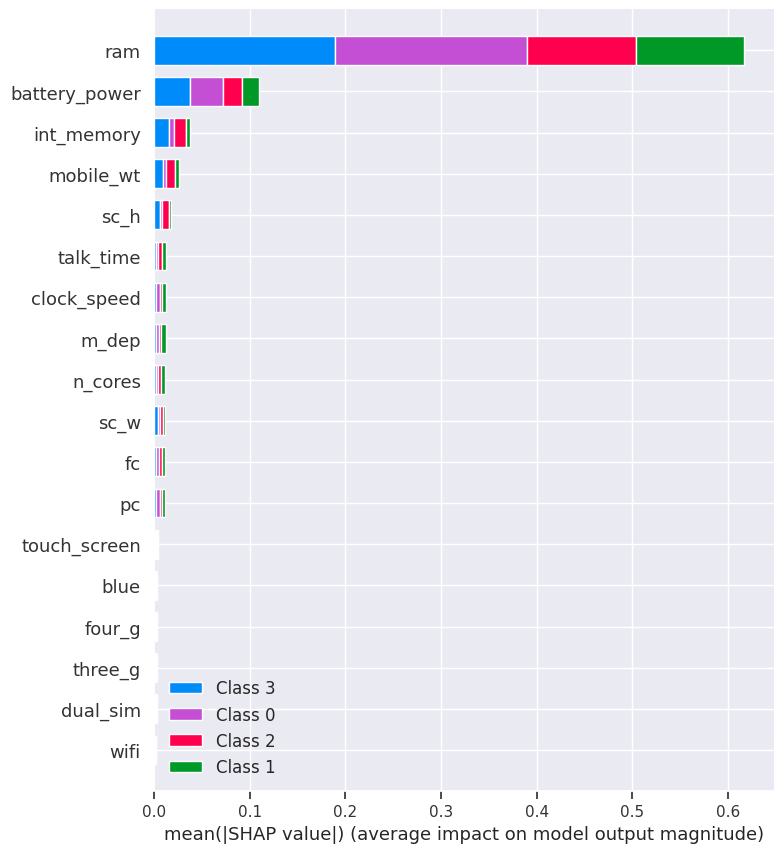

In [57]:
shap.summary_plot(shap_values, x_test)

##### Which hyperparameter optimization technique have you used and why?

In the above modeling process, we have used GridSearchCV as hyperparameter tuning technique. It is a technique for finding the optimal parameter values from a given set of parameters in a grid. It’s essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen a slight improvement over this process.
 * In accuracy we have seen a moderate improvement from 0.80 to 0.81.It is a very small improvement but it is predicting better results than the previous one. Also precision and recall metrics also shown some improvement.

 * But in terms of macro and weighted averages there is no such changes values remains same around 0.81 to 0.82. Overall this hyperparameter tuning techniques have shown slight performance improvement.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Various evaluation metrics are used in above studies to measure the model performances. Such Accuracy Score and from Classification report we saw precision, recall, and F1-score for each class. From the result of these we found macro and weighted average to find aggregated metrics.

* **Precision**: It is the ratio of true positive predictions to the total number of positive predictions made by the model. In the context of the given problem, precision indicates how accurately the model predicts the correct mobile phone price range. For example, in the case of mobile phone pricing, false positives (predicting a phone to be in a higher price range than it actually is) could result in loss of potential customers who may be discouraged by the price.

* **Recall**: It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It measures how well the model is able to identify all positive instances. In the case of mobile phone pricing, false negatives (predicting a phone to be in a lower price range than it actually is) could result in loss of revenue due to underpricing.

* **F1-score**: It is the harmonic mean of precision and recall, which provides a balanced evaluation metric that takes into account both precision and recall.

* **Confusion matrix**: Confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.

* **Weighted average**: This metric takes into account the class imbalance by weighting the metrics by the number of samples in each class. In the context of mobile price range prediction, the weighted average of precision, recall, and F1-score can help you evaluate the overall performance of the model, taking into account the importance of each class.

* **Macro average**: This metric calculates the average of precision, recall, and F1-score across all classes, without taking into account the class imbalance. In the context of mobile price range prediction, the macro average of precision, recall, and F1-score can help you evaluate the performance of the model on each class separately and identify which classes are more difficult to predict.


These above evaluation metrics are taken into account to find the feature importance and model performance which are result in the mobile phone pricing as a overall outcome.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In the study, we have tried three ML model building techniques along with hyperparameter tuning. Out of those, XG boost model shows better then followed by Logistic Regression and finally Random Forest Classifier gives moderate results when compared to others.

So we are choosing either Logistic Regression or XG boost Model because of its better predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

* From the study, Logistic regression and XG Boost models where taken into consideration. To explain that.,

  ⚛ **Logistic Regression** - It is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets and it can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification.In this case, we predict what are the features that impacting more on the result.

  ⚛**XG Boost** - On the other hand, this is a powerful tree-based ensemble learning algorithm that uses a series of decision trees to make predictions. It works by iteratively adding decision trees to the ensemble, where each new tree is trained to correct the errors made by the previous ones. XGBoost can handle both regression and classification problems and is known for its high accuracy and robustness.

* Regarding explanation of feature importance, we have used simple technique of storing the value in a dataset and visualizing it using a barplot and also we have used SHAP tool to explain the model. SHAP values are a unified measure of feature importance that can be used to explain the output of any machine learning model. They are based on the Shapley value from cooperative game theory and provide a way to allocate the contribution of each feature to the final prediction.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In Conclusion of the above study, we came to know several results from each stage of the analysis.

* From EDA (Exploratory Data Analysis) , we observed that the mobile phones in the dataset are divided into four different price ranges, each having a similar number of elements. Then we noted that gradual increase in battery power results in hike of mobile price , and also capacity of RAM shows continuous growth from low-cost to very high-cost phones. From another chart, we know that the costly phones tend to be lighter than the lower-priced ones. These kind of results will help the companies to get clarity on impactful relationship between the features.

* From the analysis we get to know that RAM, battery power, and pixel quality are the most significant factors affecting the price range of mobile phones.Next we have done data transformation to make the data more ready to fit in the ML model.

* From ML model bulding, we concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones and model explainability tools shows that what are the importance features to be considered during prediction.

Overall model will provide data to the companies about the important features to be considered and its impact in mobile phone pricing. Companies will concentrate on these factors and implement the knowledge in production and marketing to increase their growth.

Finally, In the world of ML nothing is certain because of continuously evolving data around us. To reduce the risk, model has to tuned based on the data that inserted to the model.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***